In [14]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [15]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_yacs_simple_maze

maze = gym.make('SimpleMaze-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()

This is how maze looks like
<class 'list'>
['0', '1', '1', '1']


'State: 3'

In [16]:
from lcs.agents.xcs import XCS, Configuration
from utils.xcs_utils import *


In [17]:
cfg = Configuration(number_of_actions=4,
                    user_metrics_collector_fcn=xcs_metrics,
                    covering_wildcard_chance = 1,
                    mutation_chance = 0,
                    epsilon = 1,
                   )


In [18]:
explore_trials = 5000
exploit_trials = 500

agent = XCS(cfg)
_, explore_metrics =\
    agent.explore(maze, explore_trials, False)
population, exploit_metrics =\
    agent.exploit(maze, exploit_trials)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 57, 'reward': 1000.0, 'perf_time': 0.009571499999992739, 'population': 32, 'numerosity': 36, 'average_specificity': 1.0}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 103, 'reward': 1000.0000000000005, 'perf_time': 0.03537640000001829, 'population': 31, 'numerosity': 200, 'average_specificity': 1.0}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 82, 'reward': 1000.0000000006356, 'perf_time': 0.02387029999999868, 'population': 32, 'numerosity': 200, 'average_specificity': 1.0}
INFO:lcs.agents.Agent:{'trial': 1500, 'steps_in_trial': 335, 'reward': 1000.0, 'perf_time': 0.094538899999975, 'population': 32, 'numerosity': 200, 'average_specificity': 1.0}
INFO:lcs.agents.Agent:{'trial': 2000, 'steps_in_trial': 262, 'reward': 1000.0, 'perf_time': 0.07639949999997953, 'population': 32, 'numerosity': 200, 'average_specificity': 1.0}
INFO:lcs.agents.Agent:{'trial': 2500, 'steps_in_trial': 26, 'reward': 1000.1357428823436, 'per

In [19]:
df = pd.DataFrame(explore_metrics)
df['trial'] = df.index * cfg.metrics_trial_frequency
df.set_index('trial', inplace=True)
df_exploit = pd.DataFrame(exploit_metrics)
df_exploit['trial'] = df_exploit.index * cfg.metrics_trial_frequency + explore_trials
df_exploit.set_index('trial', inplace=True)
df = df.append(df_exploit)

In [20]:
display(df)

,steps_in_trial,reward,perf_time,population,numerosity,average_specificity
trial,,,,,,
0,57,1000.000000,0.009571,32,36,1.0
5,11,1023.112229,0.005407,32,200,1.0
10,17,1002.960683,0.006189,32,200,1.0
15,31,1000.024491,0.011041,32,200,1.0
20,176,1000.000000,0.058673,32,200,1.0
...,...,...,...,...,...,...
5475,7,1100.050956,0.002458,30,200,1.0
5480,7,1100.050956,0.001158,30,200,1.0
5485,7,1100.050956,0.001148,30,200,1.0


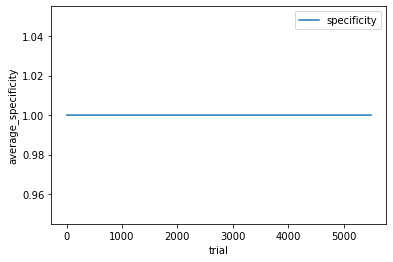

In [21]:
import pandas as pd
import numpy as np

ax = df['average_specificity'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["specificity"])


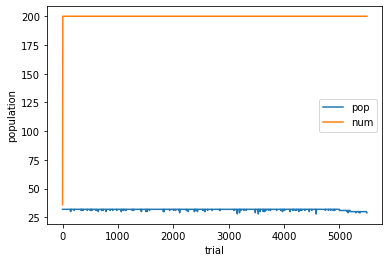

In [22]:
ax = df[['population', 'numerosity']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])

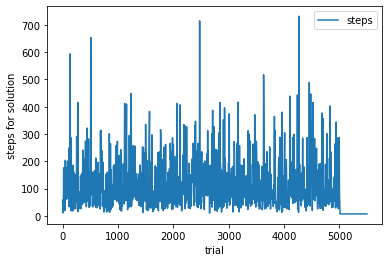

In [23]:
ax = df['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])

In [24]:
moves = [
    {'action': 0, 'exp_state': '1001'},  # 3 -> 0
    {'action': 1, 'exp_state': '1010'},  # 0 -> 1
    {'action': 1, 'exp_state': '1100'},  # 1 -> 2
    {'action': 2, 'exp_state': '0101'},  # 2 -> 5
    {'action': 2, 'exp_state': '0110'},  # 5 -> 8
    {'action': 3, 'exp_state': '0010'},  # 8 -> 7
]

for step in moves:
    match_set = population.generate_match_set(step['exp_state'], 0)
    print(f"The best action: {step['action']}")
    prediction = match_set.prediction_array
    print(f"{prediction.index(max(prediction))} {prediction}")
    print()

The best action: 0
1 [189.4468880751367, 1280.3139057920484, 1e-06, 1e-06]

The best action: 1
1 [1e-06, 1022.2228432857141, 1e-06, 1e-06]

The best action: 1
2 [1e-06, 1e-06, 885.2147964418139, 1e-06]

The best action: 2
2 [1e-06, 1e-06, 853.0610656271485, 1e-06]

The best action: 2
3 [1e-06, 504.44956740303866, 1e-06, 921.9530187832484]

The best action: 3
3 [1e-06, 1e-06, 1e-06, 1100.0509562769134]



In [25]:
for step in moves:
    match_set = population.generate_match_set(step['exp_state'], 0)
    print(f"The best action: {step['action']}")
    for cl in sorted(match_set, key=lambda cl: cl.action)[0:10]:
        print(cl)


The best action: 0
Cond:1001 - Act:0 - Num:1 [fit: 1.000, exp: 5747.00, pred: 189.447, Error:62.900812807082936]
Cond:1001 - Act:1 - Num:24 [fit: 1.000, exp: 30598.00, pred: 1280.314, Error:1.145587242960733e-12]
Cond:1001 - Act:2 - Num:1 [fit: 0.000, exp: 0.00, pred: 0.000, Error:1e-06]
Cond:1001 - Act:3 - Num:1 [fit: 0.000, exp: 0.00, pred: 0.000, Error:1e-06]
The best action: 1
Cond:1010 - Act:0 - Num:1 [fit: 0.000, exp: 0.00, pred: 0.000, Error:1e-06]
Cond:1010 - Act:1 - Num:24 [fit: 1.000, exp: 6967.00, pred: 1022.223, Error:4.560794602049363e-13]
Cond:1010 - Act:2 - Num:1 [fit: 0.000, exp: 0.00, pred: 0.000, Error:1e-06]
Cond:1010 - Act:3 - Num:1 [fit: 0.000, exp: 0.00, pred: 0.000, Error:1e-06]
The best action: 1
Cond:1100 - Act:0 - Num:1 [fit: 0.000, exp: 0.00, pred: 0.000, Error:1e-06]
Cond:1100 - Act:1 - Num:1 [fit: 0.000, exp: 0.00, pred: 0.000, Error:1e-06]
Cond:1100 - Act:2 - Num:25 [fit: 1.000, exp: 12982.00, pred: 885.215, Error:5.685935895621327e-13]
Cond:1100 - Act:3 -